In [0]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.layers import Dropout,Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D

In [136]:
!git clone https://bitbucket.org/jadslim/german-traffic-signs

fatal: destination path 'german-traffic-signs' already exists and is not an empty directory.


In [0]:
np.random.seed(0)

In [138]:
!ls german-traffic-signs



signnames.csv  test.p  train.p	valid.p


In [0]:
import pickle
import random
import pandas as pd

In [140]:
with open('german-traffic-signs/train.p', 'rb') as f:
  train_data=pickle.load(f)
  
with open('german-traffic-signs/valid.p', 'rb') as f:
  val_data=pickle.load(f)

with open('german-traffic-signs/train.p', 'rb') as f:
  test_data=pickle.load(f)
  

print(type(train_data))

X_train, Y_train=train_data['features'], train_data['labels']
X_val, Y_val=val_data['features'], val_data['labels']
X_test, Y_test=test_data['features'], test_data['labels']

<class 'dict'>


In [141]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)


(34799, 32, 32, 3)
(34799, 32, 32, 3)
(4410, 32, 32, 3)


In [0]:
assert(X_train.shape[0]==Y_train.shape[0])," The no. of imaghes is not equal to the no. of labels"
assert(X_val.shape[0]==Y_val.shape[0])," The no. of imaghes is not equal to the no. of labels"
assert(X_test.shape[0]==Y_test.shape[0])," The no. of imaghes is not equal to the no. of labels"
assert(X_train.shape[1:]==(32,32,3)), "THe dimensions of the images are not 32x32x3"
assert(X_val.shape[1:]==(32,32,3)), "THe dimensions of the images are not 32x32x3"
assert(X_test.shape[1:]==(32,32,3)), "THe dimensions of the images are not 32x32x3"

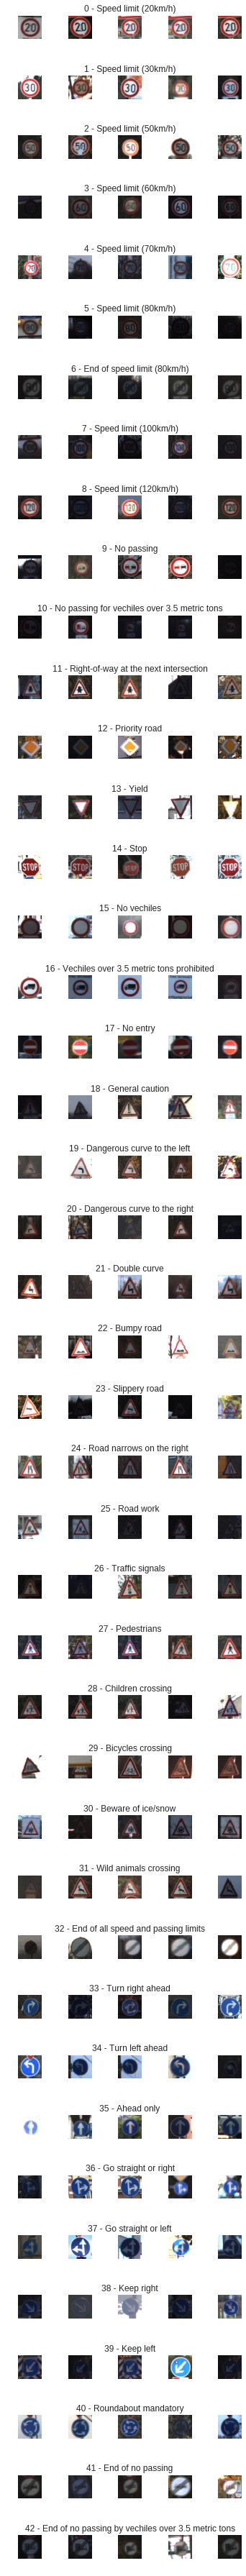

In [143]:
data = pd.read_csv('german-traffic-signs/signnames.csv')
     
num_of_samples=[]
  
cols = 5
num_classes = 43
    
fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5,50))
fig.tight_layout()
     
for i in range(cols):
  for j, row in data.iterrows():
    x_selected = X_train[Y_train == j]
    axs[j][i].imshow(x_selected[random.randint(0,(len(x_selected) - 1)), :, :], cmap=plt.get_cmap('gray'))
    axs[j][i].axis("off")
    if i == 2:
      axs[j][i].set_title(str(j) + " - " + row["SignName"])
      num_of_samples.append(len(x_selected))
      
   #(index,series)

[180, 1980, 2010, 1260, 1770, 1650, 360, 1290, 1260, 1320, 1800, 1170, 1890, 1920, 690, 540, 360, 990, 1080, 180, 300, 270, 330, 450, 240, 1350, 540, 210, 480, 240, 390, 690, 210, 599, 360, 1080, 330, 180, 1860, 270, 300, 210, 210]


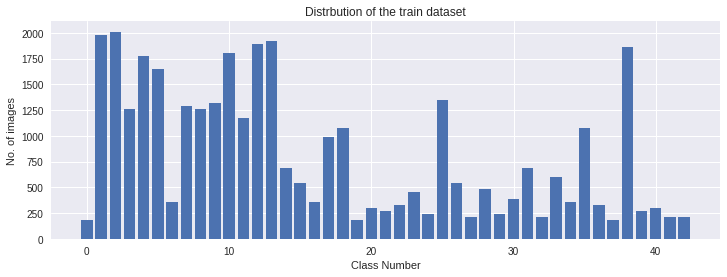

In [144]:
 print(num_of_samples)
 plt.figure(figsize=(12,4))
 plt.bar(range(0,num_classes),num_of_samples)
 plt.title("Distrbution of the train dataset")
 plt.xlabel("Class Number")
 plt.ylabel("No. of images")
 plt.show()

(34799, 32, 32, 3)
36


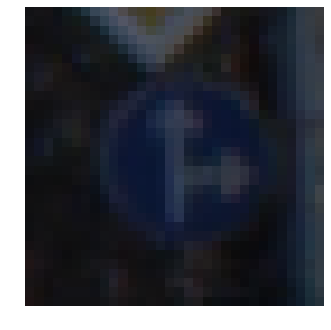

In [145]:
import cv2

plt.imshow(X_train[1000])
plt.axis('off')
print(X_train.shape)
print(Y_train[1000])

(32, 32)


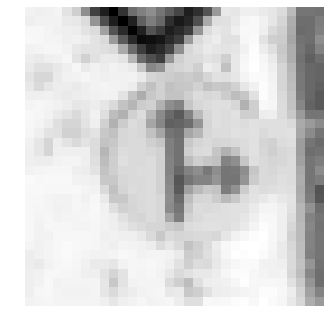

In [146]:
def grayscale(img):
  img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  return img

img= grayscale(X_train[1000])
plt.imshow(img)
plt.axis('off')
print(img.shape)

(32, 32)


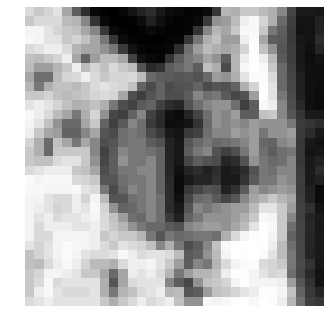

In [147]:
def equalize(img):
  img=cv2.equalizeHist(img)
  return img

img=equalize(img)
plt.imshow(img)
plt.axis('off')
print(img.shape)

In [0]:
def preprocessing(img):
  img=grayscale(img)
  img=equalize(img)
  img=img/255
  return img

X_train=np.array(list(map(preprocessing,X_train)))
X_val=np.array(list(map(preprocessing,X_val)))
X_test=np.array(list(map(preprocessing,X_test)))


(34799, 32, 32)


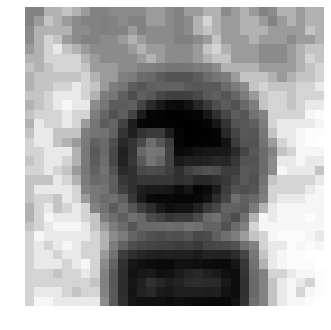

In [149]:
plt.imshow(X_train[random.randint(0,len(X_train)-1)])
plt.axis('off')
print(X_train.shape)

In [150]:
X_train=X_train.reshape(34799, 32, 32,1)
X_test=X_test.reshape(34799, 32, 32,1)
X_val=X_val.reshape(4410, 32, 32,1)
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(34799, 32, 32, 1)
(34799, 32, 32, 1)
(4410, 32, 32, 1)


(15, 32, 32, 1)


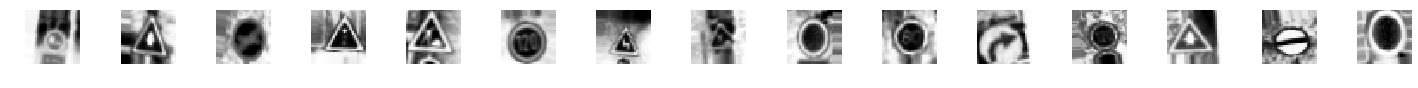

In [151]:
from keras.preprocessing.image import ImageDataGenerator
     
datagen = ImageDataGenerator(width_shift_range=0.1,
                                height_shift_range=0.1,
                                zoom_range=0.2,
                                shear_range=0.1,
                                rotation_range=10.)
     
datagen.fit(X_train)

# for X_batch, y_batch in
     

batches = datagen.flow(X_train, Y_train, batch_size = 15)
X_batch, Y_batch = next(batches)
     
fig, axs = plt.subplots(1, 15, figsize=(20, 5))
fig.tight_layout()
     
for i in range(15):
  axs[i].imshow(X_batch[i].reshape(32, 32))
  axs[i].axis("off")
     
print(X_batch.shape)

In [0]:
Y_train=to_categorical(Y_train,43)
Y_test=to_categorical(Y_test,43)
Y_val=to_categorical(Y_val,43)


In [0]:
def leNet_model():
  model = Sequential()
  model.add(Conv2D(60, (5, 5), input_shape=(32, 32, 1), activation='relu'))
  model.add(Conv2D(60, (5, 5), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  
  model.add(Conv2D(30, (3, 3), activation='relu'))
  model.add(Conv2D(30, (3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.5))
  
  model.add(Flatten())
  model.add(Dense(500, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(43, activation='softmax'))
  
  model.compile(Adam(lr = 0.001), loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [154]:
model=leNet_model()
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 28, 28, 60)        1560      
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 24, 24, 60)        90060     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 12, 12, 60)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 10, 10, 30)        16230     
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 8, 8, 30)          8130      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 4, 4, 30)          0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 4, 4, 30)          0         
__________

In [155]:
history=model.fit(X_train,Y_train,epochs=10,validation_data=(X_val,Y_val),batch_size=400,verbose=1,shuffle=1)

Train on 34799 samples, validate on 4410 samples
Epoch 1/10
34799/34799 [==============================] - 6s 166us/step - loss: 2.3860 - acc: 0.3557 - val_loss: 0.7613 - val_acc: 0.7726
Epoch 2/10
34799/34799 [==============================] - 5s 140us/step - loss: 0.7160 - acc: 0.7757 - val_loss: 0.3010 - val_acc: 0.9111
Epoch 3/10
34799/34799 [==============================] - 5s 140us/step - loss: 0.4012 - acc: 0.8732 - val_loss: 0.1957 - val_acc: 0.9395
Epoch 4/10
34799/34799 [==============================] - 5s 140us/step - loss: 0.2912 - acc: 0.9080 - val_loss: 0.1442 - val_acc: 0.9603
Epoch 5/10
34799/34799 [==============================] - 5s 140us/step - loss: 0.2308 - acc: 0.9274 - val_loss: 0.1108 - val_acc: 0.9667
Epoch 6/10
34799/34799 [==============================] - 5s 140us/step - loss: 0.1898 - acc: 0.9403 - val_loss: 0.1051 - val_acc: 0.9680
Epoch 7/10
34799/34799 [==============================] - 5s 140us/step - loss: 0.1589 - acc: 0.9508 - val_loss: 0.1250 - v

Text(0.5,0,'epoch')

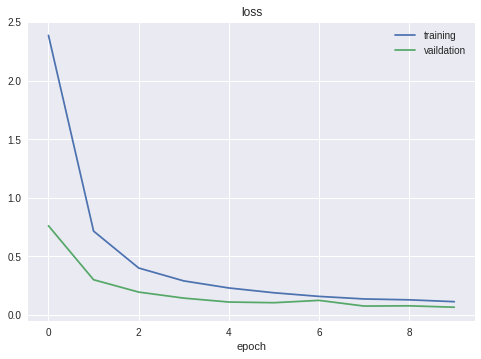

In [156]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','vaildation'])
plt.title('loss')
plt.xlabel('epoch')

Text(0.5,0,'epoch')

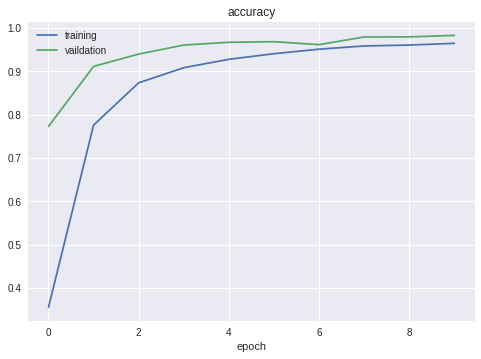

In [157]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['training','vaildation'])
plt.title('accuracy')
plt.xlabel('epoch')

In [158]:
score=model.evaluate(X_test,Y_test,verbose=0)

print("Test score: ", score[0])
print("Test accuracy: ",score[1])

Test score:  0.022054656075022237
Test accuracy:  0.9949423834018218


(32, 32)
predicted sign: [23]


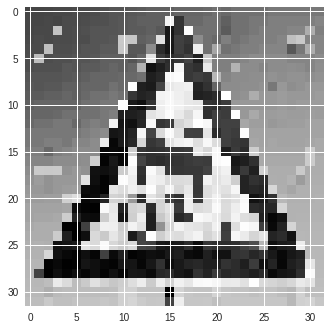

In [159]:
#fetch image
     
import requests
from PIL import Image
url = 'https://previews.123rf.com/images/bwylezich/bwylezich1608/bwylezich160800375/64914157-german-road-sign-slippery-road.jpg'
r = requests.get(url, stream=True)
img = Image.open(r.raw)
plt.imshow(img)
plt.imshow(img, cmap=plt.get_cmap('gray'))
     
     
#Preprocess image
     
img = np.asarray(img)
img = cv2.resize(img, (32, 32))
img = preprocessing(img)
plt.imshow(img, cmap = plt.get_cmap('gray'))
print(img.shape)
     
#Reshape reshape
     
img = img.reshape(1, 32, 32, 1)
     
    #Test image
print("predicted sign: "+ str(model.predict_classes(img)))